<a href="https://colab.research.google.com/github/Natalya7oct/Feature-selection/blob/master/HW_MDS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1:
Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная:

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [0]:
import numpy as np

In [0]:
m_a = np.array([[-1, 0],
              [0, -1]])
print(m_a)
# проверка
print(m_a.dot(m_a.T))

[[-1  0]
 [ 0 -1]]
[[1 0]
 [0 1]]


In [0]:
m_b = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
print(m_b)
# проверка
print(m_b.dot(m_b.T))

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [0]:
m_c = np.array([[-1, 0, 0],
              [0, -1, 0],
              [0, 0, -1]])
print(m_c)
# проверка
print(m_c.dot(m_c.T))

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [0]:
m_d = np.array([[1, 1],
              [1, 2]])
print(m_d)
# проверка
print(np.linalg.det(m_d))

[[1 1]
 [1 2]]
1.0


In [0]:
m_e = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
print(m_e)
# проверка
print(np.linalg.det(m_e))

[[1 0 0]
 [0 1 0]
 [0 0 1]]
1.0


Задание 2:
Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [0]:
m_2a = np.array([[2, 2],
              [1, 3]])
w, v = np.linalg.eig(m_2a)
print(w, v)

[1. 4.] [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [0]:
m_2b = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
w, v = np.linalg.eig(m_2b)
print(w, v)

[6. 3. 3.] [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]


Задание 3:
Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [7]:
m_3 = np.array([[1, 2],
              [2,3]])
print(m_3)

[[1 2]
 [2 3]]


In [10]:
a3, U3 = np.linalg.eig(m_3)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [0]:
D=np.diag(a3)

In [15]:
U.dot(D).dot(U.T)

array([[1., 2.],
       [2., 3.]])

Задание 4:
Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [0]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [0]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [0]:
X, y = load_digits(return_X_y=True)

In [19]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


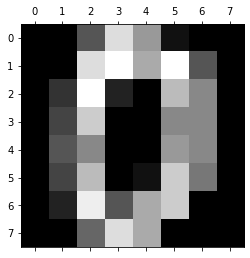

In [20]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [0]:
def func_svd(i):
  svd = TruncatedSVD(n_components=i)
  X_reduced = svd.fit_transform(X)
  rf_reduced = RandomForestClassifier(oob_score=True)
  rf_reduced.fit(X_reduced, y)
  return rf_reduced.oob_score_


In [0]:
oob_scores=[]

In [0]:
new=0
for i in range(1, 9):
  oob_scores.append(func_svd(i))

In [48]:
oob_scores

[0.11853088480801335,
 0.36505286588759045,
 0.6176961602671118,
 0.7378964941569283,
 0.7941012799109627,
 0.8414023372287145,
 0.8458542014468559,
 0.857540345019477]

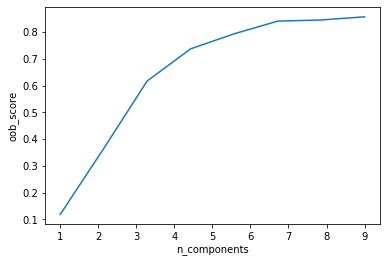

In [51]:
n_components = np.linspace(1, 9, 8)
oob_score = [ oob_scores [i] for i in range(len(n_components))]

plt.plot(n_components, oob_score)
plt.ylabel('oob_score')
plt.xlabel('n_components')

plt.show()